In [6]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

TASK1

coefficient: [20213.13039118]
interception: 1998230.6544238054
predicted prices for 100m^2, 150m^2m, 200m^2: [4019543.69354194 5030200.21310101 6040856.73266008]


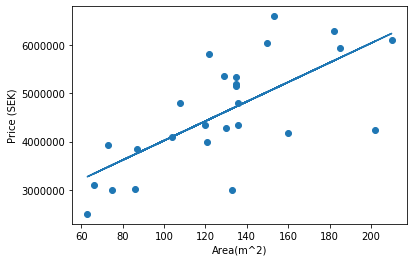

In [2]:
#Creates a linear regression of area and prices of houses
def linRegression():
    #Import data
    house = pd.read_csv('House.csv')
    #Create model
    model= LinearRegression()
    x= house['Area']
    y= house['Price']
    model.fit(x[:, np.newaxis],y)
    #Create prediction
    yfit = model.predict(x[:, np.newaxis])
    #Create plot
    plt.scatter(x,y)
    plt.xlabel('Area(m^2)')
    plt.ylabel('Price (SEK)')
    plt.plot(x,yfit)
    #Print slope and interception
    print("coefficient:", model.coef_)
    print("interception:", model.intercept_)
    #Predict the price for 100, 150 and 200 square meter houses.
    predictions = np.linspace(100, 200, 3)
    print("predicted prices for 100m^2, 150m^2m, 200m^2:",model.predict(predictions[:,np.newaxis]))
    plt.show()

linRegression()


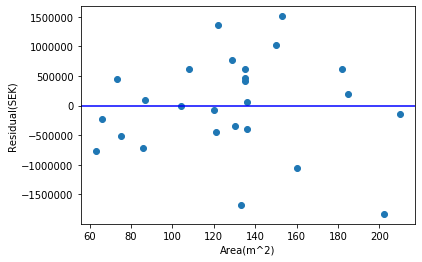

In [3]:
def residual():
    #Import data
    house = pd.read_csv('House.csv')
    #Create model
    model= LinearRegression()
    x= house['Area']
    y= house['Price']
    model.fit(x[:, np.newaxis],y)
    #Create prediction line
    yfit = model.predict(x[:, np.newaxis])
    #Create plot
    plt.scatter(x,y-yfit)
    plt.xlabel('Area(m^2)')
    plt.ylabel('Residual(SEK)')
    plt.axhline(y=0, color='b', linestyle='-')
    plt.show()

residual()

TASK2

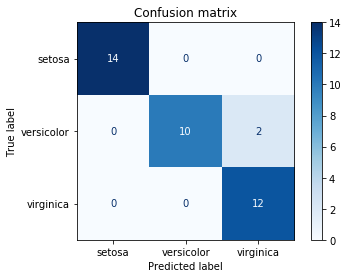

In [4]:
def logRegression():
    #Load the iris data set.
    iris = load_iris()
    X= iris.data
    Y= iris.target
    class_names = iris.target_names
    #Split the sets into training and test sets
    XTrain, XTest, YTrain, YTest = train_test_split(X,Y)
    #built model with one-vs-rest approach
    model= LogisticRegression(multi_class='ovr')
    model.fit(XTrain,YTrain)
    
    #Display confusion matrix
    disp = plot_confusion_matrix(model, XTest, YTest,display_labels=class_names,cmap=plt.cm.Blues)
    disp.ax_.set_title('Confusion matrix')
    plt.show()

logRegression()

TASK3

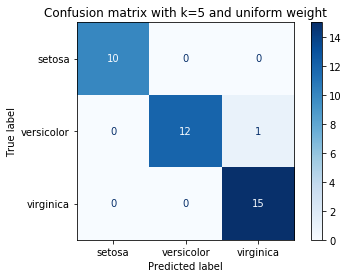

In [33]:
def question3_train(x, y):
    '''
    train a model with default values and built confusion matrix
    '''
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
    
    # create model with k = 5 default value and uniform weights
    model = KNeighborsClassifier()
    model.fit(x_train, y_train)
    title = "Confusion matrix with k=5 and uniform weight"
    disp = plot_confusion_matrix(model, x_test, y_test,
                                display_labels=iris.target_names,
                                cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    # plt.savefig('confusion_matrix_default.png')
    plt.show()


iris = datasets.load_iris()
x = iris['data']
y = iris['target']
question3_train(x, y)

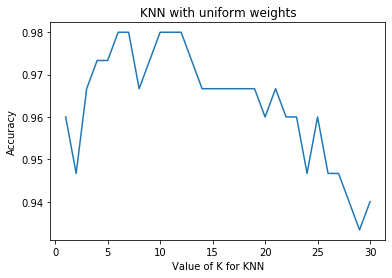

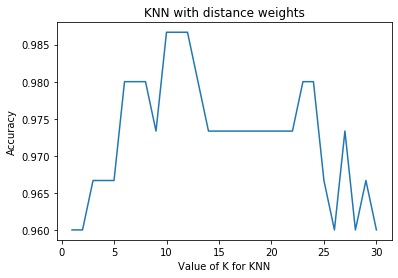

In [34]:
def find_optimal_k(x, y, weights='uniform'):
    '''
    apply k-fold cross validation and take different k, plot the error to the corresponding k and find optimal k.
    '''        
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        # 5-fold cross validation
        score = (cross_val_score(knn, x, y, cv=5, scoring='accuracy'))
        k_scores.append(score.mean())

    plt.plot(k_range, k_scores)
    plt.title("KNN with {} weights".format(weights))
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Accuracy')
    plt.show()

    # sort two lists according to score values
    k_scores, k_range = zip(*sorted(zip(k_scores, k_range)))
    # take k values with the best accuracy
    optimal_k = k_range[-3:]
    return optimal_k




optimal_k_uniform = find_optimal_k(x, y, 'uniform')
optimal_k_distance = find_optimal_k(x, y, 'distance')

In [35]:
print("optimal k values for uniform weights =", optimal_k_uniform)
print("optimal k values for distance weights =", optimal_k_distance)

optimal k values for uniform weights = (10, 11, 12)
optimal k values for distance weights = (10, 11, 12)


In [36]:
def confusion_matrix(model_, x_test, y_test, title):
    disp = plot_confusion_matrix(model_, x_test, y_test,
                                display_labels=iris.target_names,
                                cmap=plt.cm.Blues)
    disp.ax_.set_title(title)


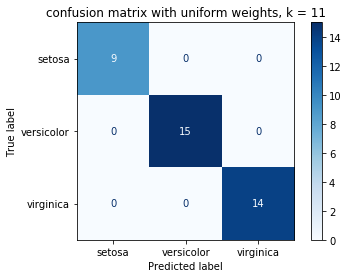

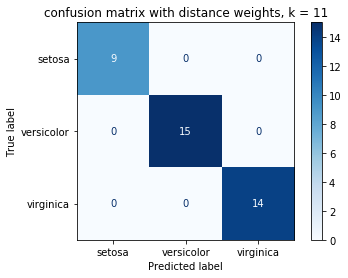

In [37]:
def question3_compare(x, y, k_uniform, k_distance):
    '''
    function plots two confusion matrix both for uniform and distance weights with optimal k value.
    '''
    model_uni = KNeighborsClassifier(n_neighbors = k_uniform, weights='uniform')
    model_dist = KNeighborsClassifier(n_neighbors = k_distance, weights='distance')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

    model_uni.fit(x_train, y_train) 
    model_dist.fit(x_train, y_train)

    confusion_matrix(model_uni, x_test, y_test, "confusion matrix with uniform weights, k = {}".format(k_uniform))
    confusion_matrix(model_dist, x_test, y_test, "confusion matrix with distance weights, k = {}".format(k_distance))

# we choose as an optimal value 11, choosing an odd number is more applicable since even values can be cause for a tie between two classes.
question3_compare(x, y, optimal_k_uniform[1], optimal_k_distance[1])